In [1]:
# AI from ML Algortihm
# 0. punya data dan tau ingin untuk apa?
# 1. kita buat inisiasi mesin cerdas (model) [masih bodoh]
# 2. training model tersebut dengan data
# 3. model cerdas
# 4. evaluasi model (degree of intellegent)

# Kategori utama ML yang umum
# 1. Unsuppervised learning
#         - clustering (1)
# 2. Suppervised learing
#         - classification (2)
#         - regression (3)
# 3. Reinforce learing
# 4. dst

In [2]:
#          data                     target
# ['merah',  'besar',  '10kg']      'apel'
# ['kuning', 'kecil',  '20kg']      'jeruk'
# ['hijau',  'sedang', '12kg']      'pisang'
# ['merah',  'kecil',  '1kg']       'jeruk'
# ['ungu',   'besar',  '0.4kg']     'apel'

In [3]:
# K-means: algoritma untuk membuat AI dengan spesifik kecerdasan
# mengelompokan data

# 1. Tentukan jumlah cluster
# 2. Generate initial cluster misalnya secara random
# 3. Labeli data yang ada masuk ke kluster yang mana?
# 4. Membuat custer center baru berdasarkan anggotanya agar 
#    lebih mempresentasikan cluster, misalnya pilih value meannya.
# 5. Ulaing 3 dan 4 samapi tidak ada perbedaan yang mencolok
#    (convergen)


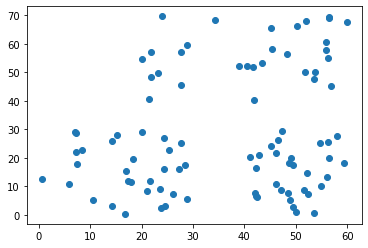

In [4]:
import random
import matplotlib.pyplot as plt
import pandas as pd
random.seed(0)


def create_dummy_df(plot=True):
    x = []
    y = []
    for i in range(30):
        x.append(random.uniform(0, 30))
        y.append(random.uniform(0, 30))
        
        x.append(random.uniform(40, 60))
        y.append(random.uniform(0, 30))
        
        x.append(random.uniform(20, 60))
        y.append(random.uniform(40, 70))
    df = pd.DataFrame({'a': x, 'b': y})
#     print("befor reset index", df)
#     print(df.columns)
    df = df.reset_index()
#     print(df)
#     print(df.columns)
    if plot:
        plt.scatter(df['a'], df['b'])
    return df

df = create_dummy_df()

In [5]:
df.head()

,index,a,b
0,0,25.332656,22.738632
1,1,48.411432,7.767503
2,2,40.450989,52.148024
3,3,23.513958,9.099382
4,4,49.531939,17.501461


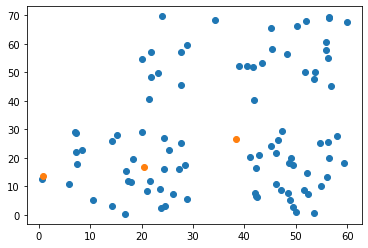

In [7]:
# Step 1: Jumlah cluster
k = 3

# Step 2: Create initial cluster randomly 
#         and bounded to min and max value 
#         so the created cluster in between
def create_initial_random_centroid(df, k, plot=True):
    c_a = []
    c_b = []
    for i in range(k):
        c_a.append(random.uniform(min(df['a']), max(df['a'])))
        c_b.append(random.uniform(min(df['b']), max(df['b'])))
    centr = {
        'a': c_a,
        'b': c_b
    }
    if plot:
        plt.scatter(df['a'], df['b'])
        plt.scatter(centr['a'], centr['b'])
    return centr

centr = create_initial_random_centroid(df, k)

In [8]:
centr

{'a': [0.7736606551474203, 20.468967361296635, 38.3963832969977],
 'b': [13.695133974381967, 16.958382386534137, 26.603542696680865]}

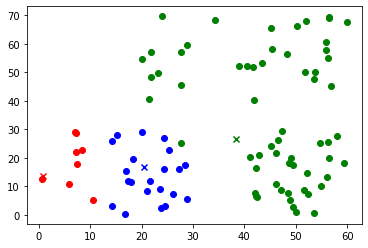

In [9]:
# Step3: Labeli data masuk kluster mana?

import numpy as np

def labelator(x, centr):
    dist = []
    for i in range(len(centr['a'])):
        dist.append(
            np.sqrt((centr['a'][i] - x['a']
                     )**2 + (centr['b'][i] - x['b']
                             )**2))
    
    c = np.argmin(dist)
    if c == 0:
        c = 'red'
    elif c == 1:
        c = 'blue'
    else:
        c = 'green'
    return c



def plt_with_cluster(df, centr):
    plt.scatter(df[df['cluster'] == 'red']['a'], df[df['cluster'] == 'red']['b'], color='r')
    plt.scatter(df[df['cluster'] == 'blue']['a'], df[df['cluster'] == 'blue']['b'], color='b')
    plt.scatter(df[df['cluster'] == 'green']['a'], df[df['cluster'] == 'green']['b'], color='g')
                    
    plt.scatter([centr['a'][0]], [centr['b'][0]], marker='x', color='r')
    plt.scatter([centr['a'][1]], [centr['b'][1]], marker='x', color='b')
    plt.scatter([centr['a'][2]], [centr['b'][2]], marker='x', color='g')
    
    plt.show()
    return


def labeli_data(df, centr, plot=True):
    cols = list(df.columns)
    df['cluster'] = df.apply(labelator, args=[centr], axis=1)
    
    if plot:
        plt_with_cluster(df, centr)
    return df

df = labeli_data(df, centr)

                    
        

In [10]:
# Step 4: Membuat cluster baru yang lebih represntatif
def get_new_centroid(df):
    c_a_ = []
    c_b_ = []
    c = ['red', 'blue', 'green']
    for i in range(len(c)):
        df_c = df[df['cluster'] == c[i]]
        c_a_.append(np.mean(df_c['a']))
        c_b_.append(np.mean(df_c['b']))
    return {'a': c_a_, 'b': c_b_}
new_centr = get_new_centroid(df)
new_centr

{'a': [6.850273033951874, 21.457150566276656, 45.30886724800562],
 'b': [18.634674162538246, 13.89018701708048, 35.34643437999481]}

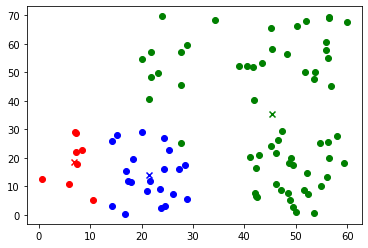

In [11]:
plt_with_cluster(df, new_centr)

Pada iterasi ke: 1 =================


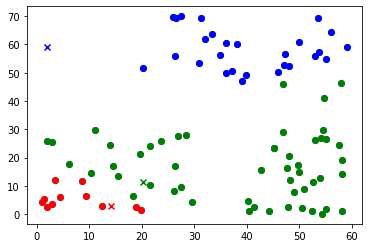

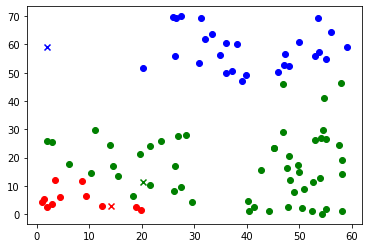

Pada iterasi ke: 2 =================


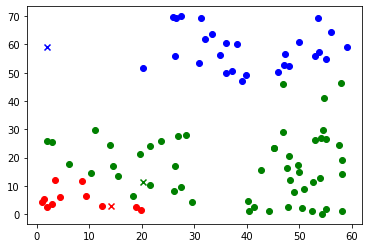

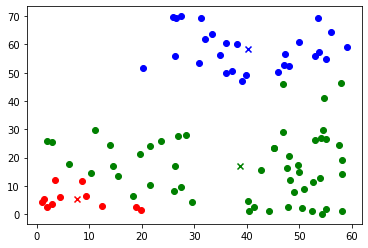

Pada iterasi ke: 3 =================


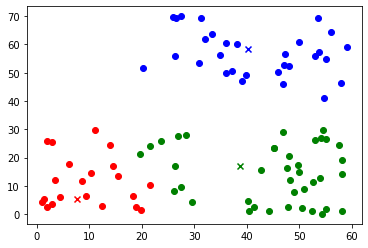

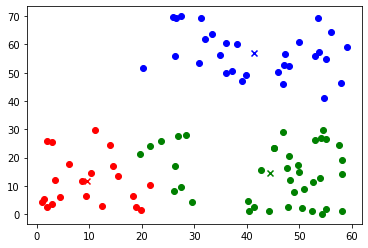

Pada iterasi ke: 4 =================


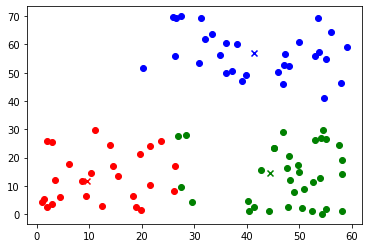

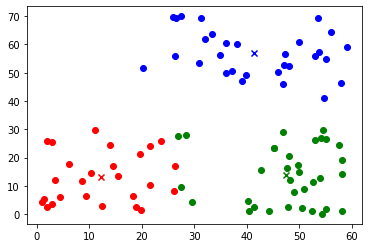

Pada iterasi ke: 5 =================


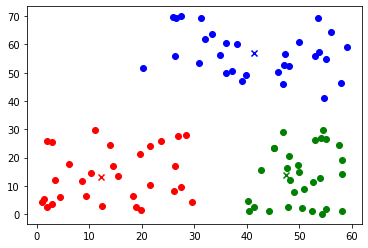

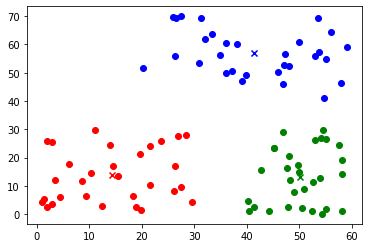

Pada iterasi ke: 6 =================


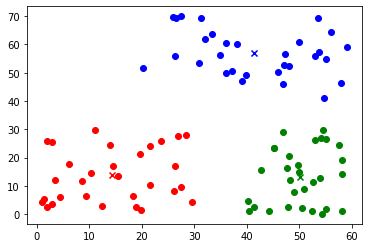

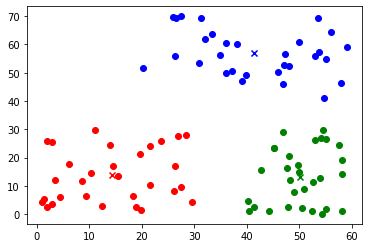

Pada iterasi ke: 7 =================


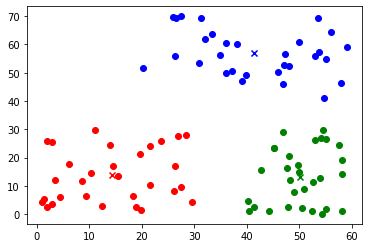

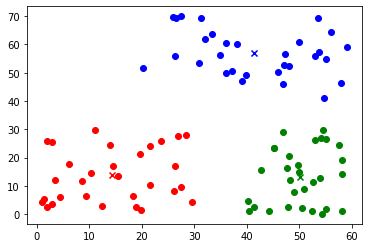

Pada iterasi ke: 8 =================


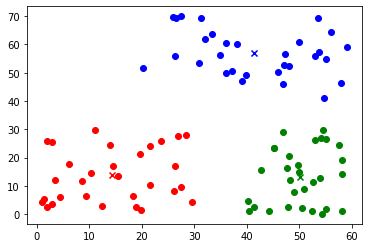

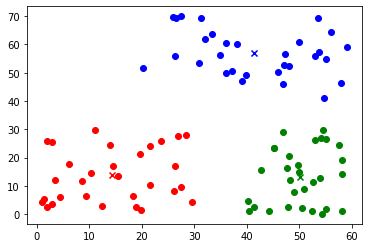

Pada iterasi ke: 9 =================


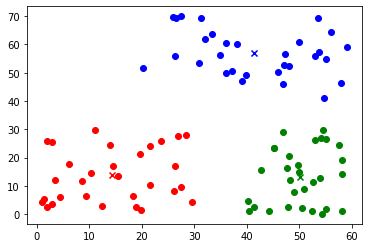

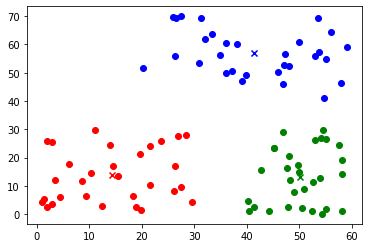

Pada iterasi ke: 10 =================


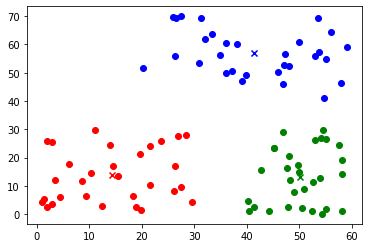

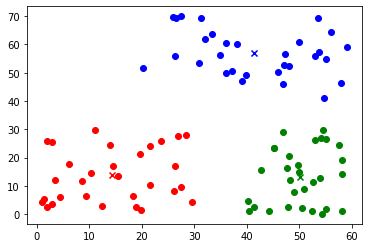

Pada iterasi ke: 11 =================


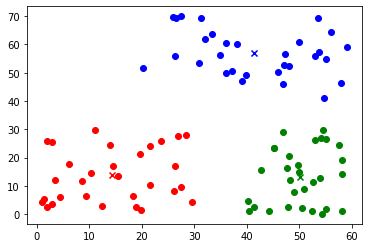

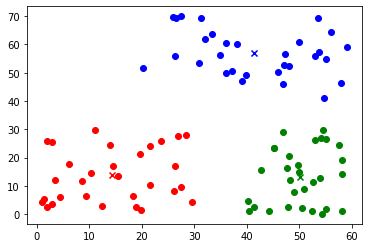

Pada iterasi ke: 12 =================


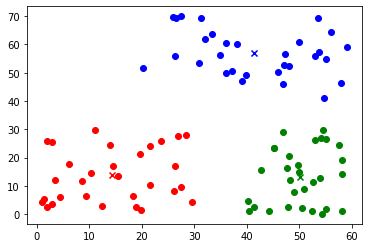

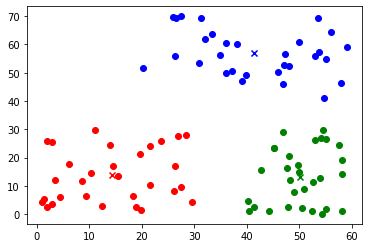

Pada iterasi ke: 13 =================


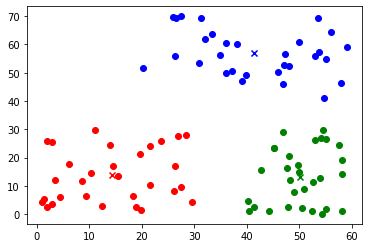

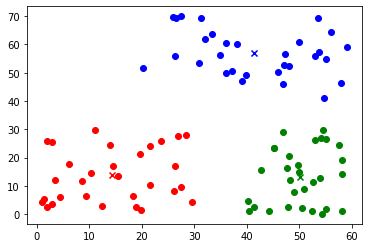

Pada iterasi ke: 14 =================


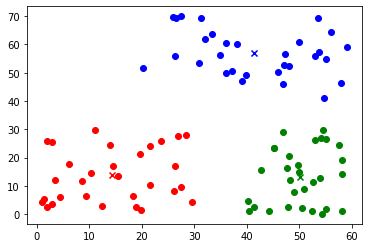

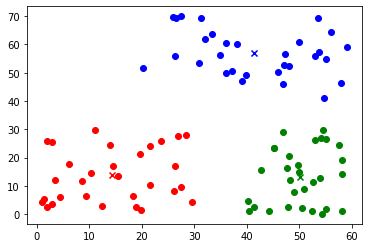

Pada iterasi ke: 15 =================


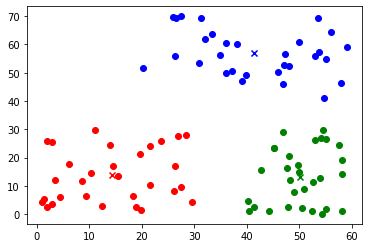

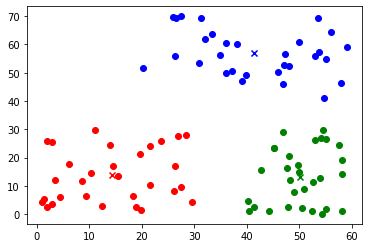

Pada iterasi ke: 16 =================


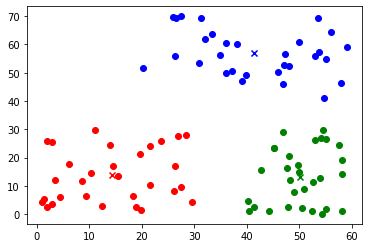

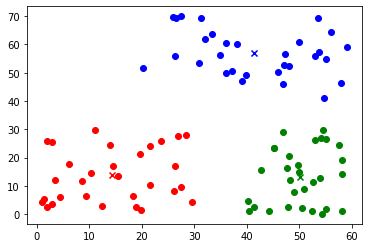

Pada iterasi ke: 17 =================


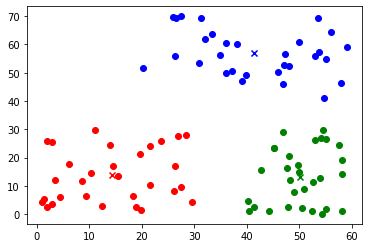

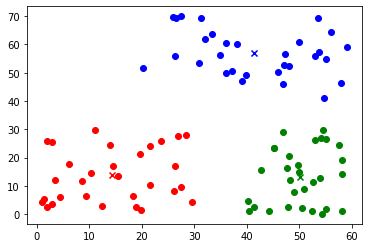

Pada iterasi ke: 18 =================


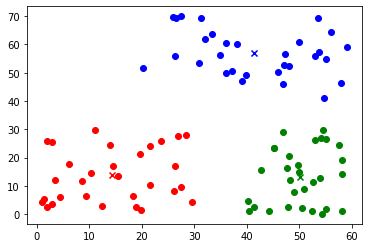

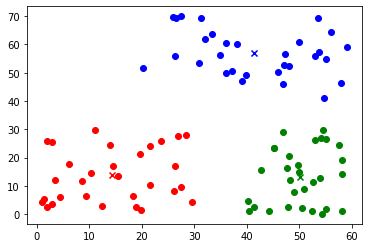

Pada iterasi ke: 19 =================


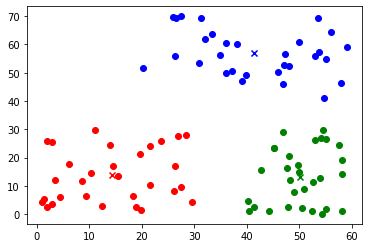

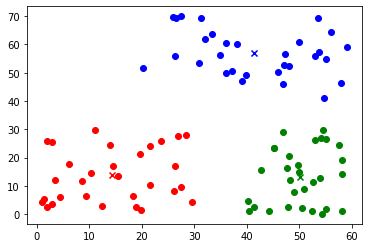

Pada iterasi ke: 20 =================


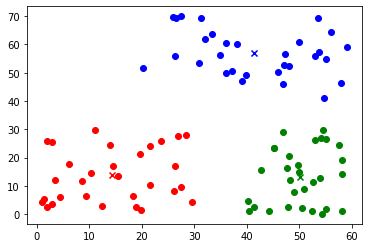

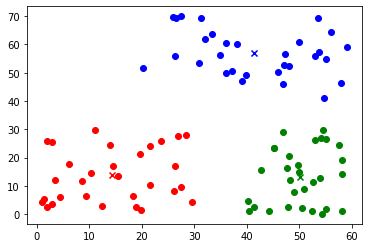

In [12]:
# Step 5: ulangi 3 dan 4
df = create_dummy_df()
k = 3

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
while iterasi < 20:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    
    


In [13]:
# Stop when convergen
def cekker(a, b):
    diff = 1000
    for i in range(len(a)):
        x = abs(a[i] - b[i])
        if x < diff:
            diff = x
    print("diff: ", diff)
    if diff < 0.001:
        return True
    else:
        return False

Pada iterasi ke: 1 =================


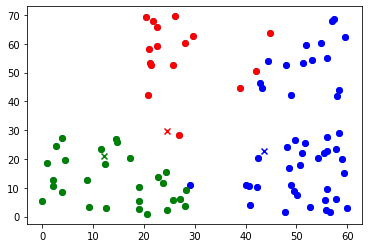

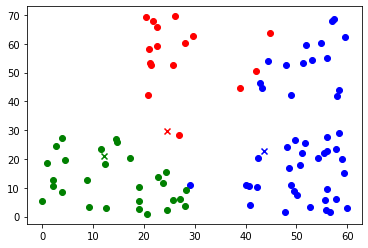

Pada iterasi ke: 2 =================


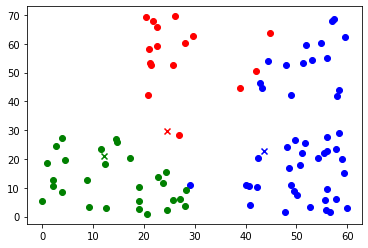

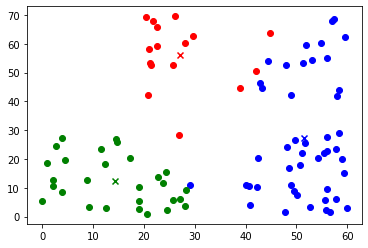

diff:  2.1901261845836366
Pada iterasi ke: 3 =================


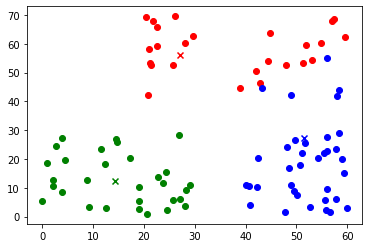

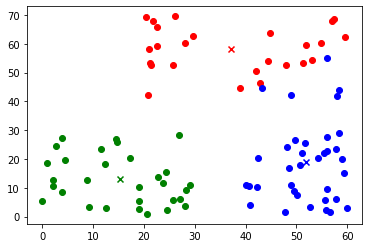

diff:  0.47774225867215847
Pada iterasi ke: 4 =================


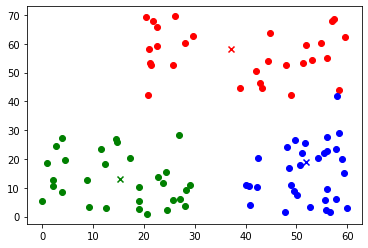

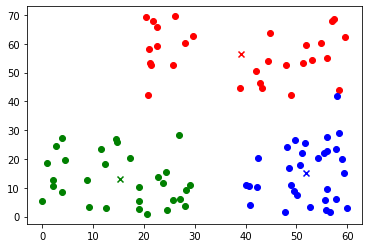

diff:  0.0
YeY, convergen pada iterasi ke:  4


In [14]:
# Step 5: ulangi 3 dan 4 dengan kriteria stop
df = create_dummy_df()
k = 3

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
convergence = False
while not convergence:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    if cekker(centr_i['a'], centr_i2['a']) or (iterasi == 20):
        print("YeY, convergen pada iterasi ke: ", iterasi)
        break
    


In [15]:
# AI model kameans: centr_i (last)
centr_i

{'a': [39.10440589682314, 51.97980030761, 15.310294199961358],
 'b': [56.50766433763616, 15.219069016322782, 12.913976564355018]}

In [16]:
df.head()

,index,a,b,cluster
0,0,4.464585,19.682510,green
1,1,59.371965,15.149991,blue
2,2,56.043619,55.072858,red
3,3,17.216174,20.357141,green
4,4,56.102200,22.735391,blue


,index,a,b
0,0,14.126626,28.508050
1,1,55.930340,8.309107
2,2,42.327264,60.646009
3,3,23.869715,13.384932
4,4,47.975538,23.029222


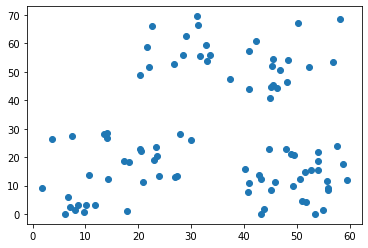

In [17]:
new_df = create_dummy_df()
new_df.head()

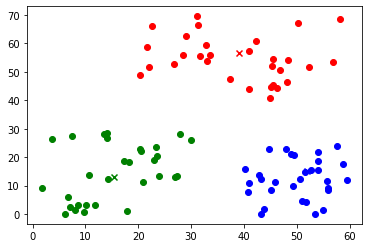

,index,a,b,cluster
0,0,14.126626,28.508050,green
1,1,55.930340,8.309107,blue
2,2,42.327264,60.646009,red
3,3,23.869715,13.384932,green
4,4,47.975538,23.029222,blue


In [18]:
def predict(df, model):
    df = labeli_data(df, model)
    return df

new_df = predict(new_df, centr_i)
new_df.head()

In [19]:
# Performance dari model yang tadi dibuat
df['cluster_int'] = [0 if x == 'red' else 1 if x == 'blue' else 2 for x in list(df['cluster'])]
df.head()


,index,a,b,cluster,cluster_int
0,0,4.464585,19.682510,green,2
1,1,59.371965,15.149991,blue,1
2,2,56.043619,55.072858,red,0
3,3,17.216174,20.357141,green,2
4,4,56.102200,22.735391,blue,1


In [21]:
# Silhouette [-1, 1]
# if 1, cluster is dense and well-sparated
# if 0, ada kluster yang overlaping
# if -1 ada data yang salah di labeli

from sklearn.metrics import silhouette_score
score = silhouette_score(df[['a', 'b']], df['cluster_int'], 
                        metric='euclidean')
score

0.5465609794331495

In [25]:
# Memakai packege
from sklearn import datasets
from sklearn.cluster import KMeans

# load data
iris = datasets.load_iris()
x_kita = df[['a', 'b']].to_numpy()

# inisiasi model
km = KMeans(n_clusters=3, random_state=42)

# training
km.fit_predict(x_kita)

# score
score = silhouette_score(x_kita, km.labels_, 
                        metric='euclidean')
print("skor:", score)

skor: 0.5512579333536278


In [26]:
from sklearn import cluster

dir(cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_elkan',
 '_k_means_fast',
 '_k_means_lloyd',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer


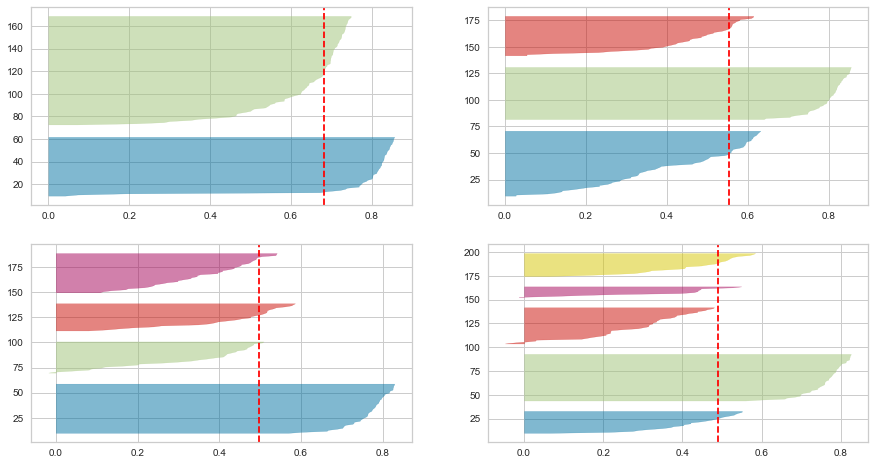

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i in [2, 3, 4, 5]:
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=100,
        random_state=42
        )
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                     colors='yellowbrick',
                                     ax=ax[q-1][mod])
    visualizer.fit(x)

In [29]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_check_n_features',
 '_fig',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_validate_data',
 '_wrapped',
 'ax',
 'color',
 'colors',
 'draw',
 'estimator',
 'fig',
 'finalize',
 'fit',
 'force_model',
 'get_params',
 'is_fitted',
 'n_clusters_',
 'n_samples_',
 'name',
 'poof',
 'score',
 'set_params',
 'set_title',
 'show',
 'silhouette_samples_',
 'silhouette_score_',
 'size',
 'title',
 'y_tick_pos_']

In [31]:
print(visualizer.__doc__)


    The Silhouette Visualizer displays the silhouette coefficient for each
    sample on a per-cluster basis, visually evaluating the density and
    separation between clusters. The score is calculated by averaging the
    silhouette coefficient for each sample, computed as the difference
    between the average intra-cluster distance and the mean nearest-cluster
    distance for each sample, normalized by the maximum value. This produces a
    score between -1 and +1, where scores near +1 indicate high separation
    and scores near -1 indicate that the samples may have been assigned to
    the wrong cluster.

    In SilhouetteVisualizer plots, clusters with higher scores have wider
    silhouettes, but clusters that are less cohesive will fall short of the
    average score across all clusters, which is plotted as a vertical dotted
    red line.

    This is particularly useful for determining cluster imbalance, or for
    selecting a value for K by comparing multiple visualizers.


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


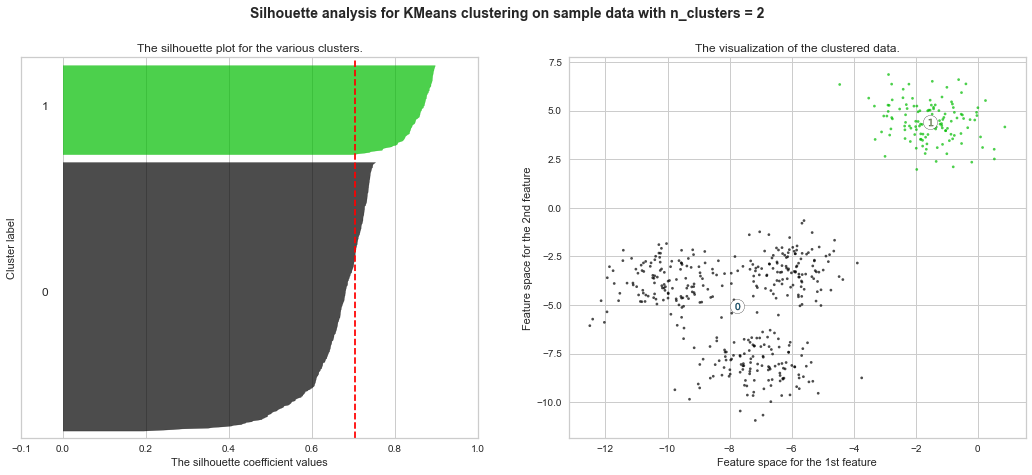

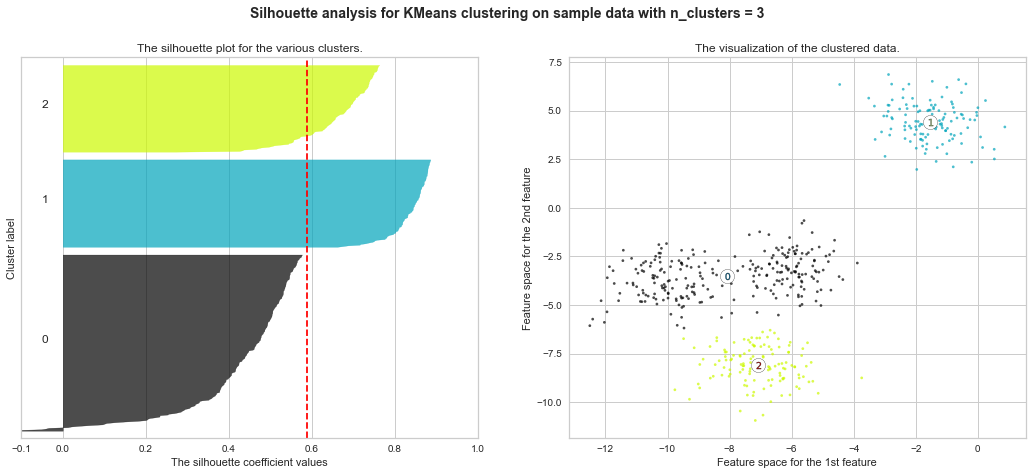

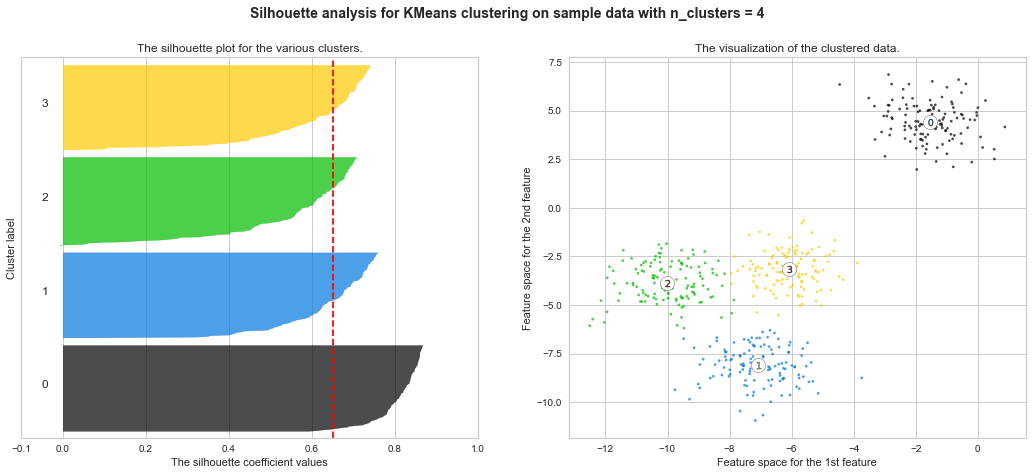

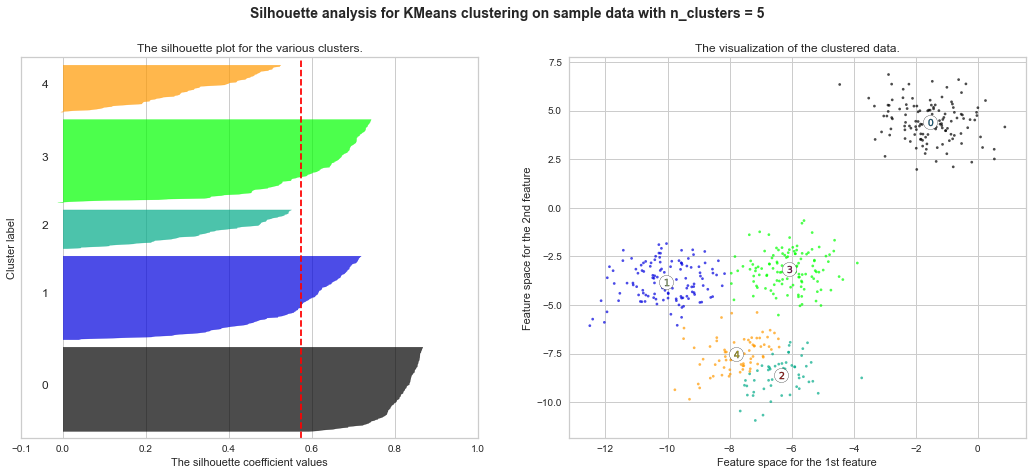

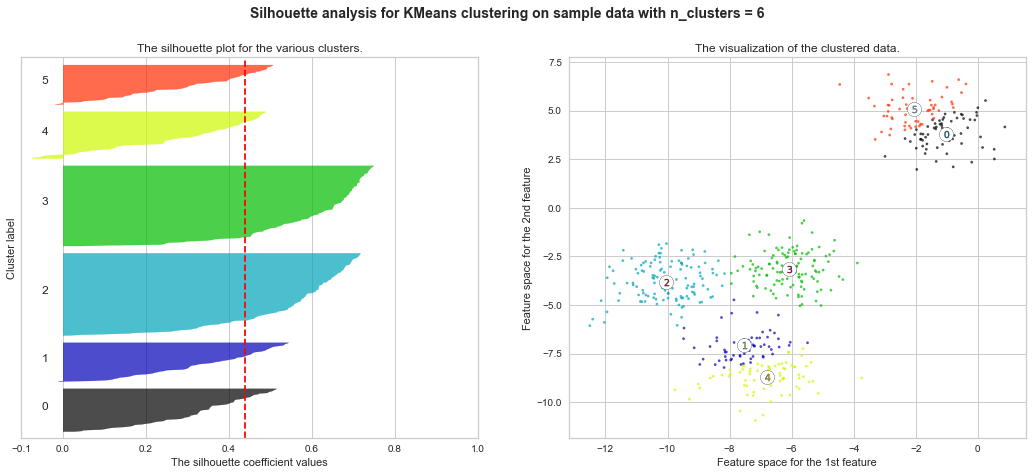

In [32]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()